In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import glob
import os


In [2]:
all_files = glob.glob(os.path.join("/Users/bhupendra/projects/earnest/data/out/*.csv"))

data = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [3]:

#file_path = '/Users/bhupendra/projects/earnest/data/out/IOWA_windy-weather-episodes_1996-2023_v24-04.csv'
#data = pd.read_csv(file_path)

In [4]:
data

,time,tzone,lat,lon,state,episode,events,derecho,tornado,funnel_cloud,...,sleet,storm_surge_tide,tropical_depression,tropical_storm,tsunami,volcanic_ash,waterspout,wildfire,winter_storm,winter_weather
0,1996-03-25 16:10:00,EST,40.550000,-81.920000,OHIO,2031678,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1996-03-25 16:15:00,EST,40.800000,-81.380000,OHIO,2031679,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1996-03-25 16:20:00,EST,40.100000,-80.970000,OHIO,2032951,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1996-03-25 16:30:00,EST,39.670000,-80.870000,OHIO,2032948,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1996-03-25 16:35:00,EST,39.920000,-80.780000,OHIO,2032950,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39325,2023-08-17 17:42:00,EST-5,40.629750,-85.457000,INDIANA,184415,4,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39326,2023-08-24 06:12:30,EST-5,40.895000,-85.400000,INDIANA,184418,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39327,2023-08-25 18:59:00,EST-5,38.318350,-86.088800,INDIANA,184675,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39328,2023-08-25 21:22:09,EST-5,39.311300,-87.055657,INDIANA,182808,7,False,False,False,...,False,False,False,False,False,False,False,False,False,False


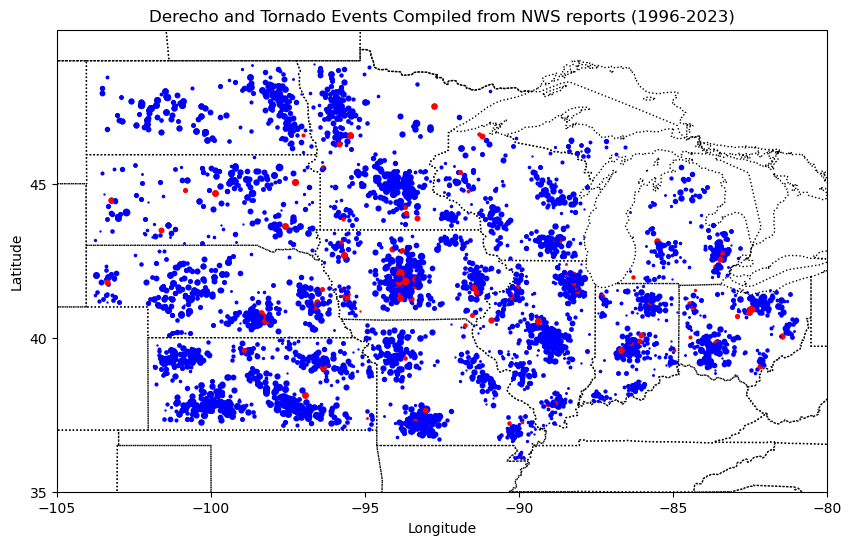

In [5]:

def plot_events(df):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-80, -105, 35, 50], crs=ccrs.PlateCarree())

    # Map features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':')

    # Plot derecho and tornado events
    for _, row in df[(df['derecho'] | df['tornado'])].iterrows():
        color = 'red' if row['derecho'] else 'blue'
        bubblesize = np.log(row['events'])
        ax.plot(row['lon'], row['lat'], 'o', markersize=bubblesize, color=color, transform=ccrs.PlateCarree())

    # Set tickmarks
    ax.set_xticks(np.arange(-105, -79, 5))
    ax.set_yticks(np.arange(35, 50, 5))

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Derecho and Tornado Events Compiled from NWS reports (1996-2023)')
    plt.show()

plot_events(data)


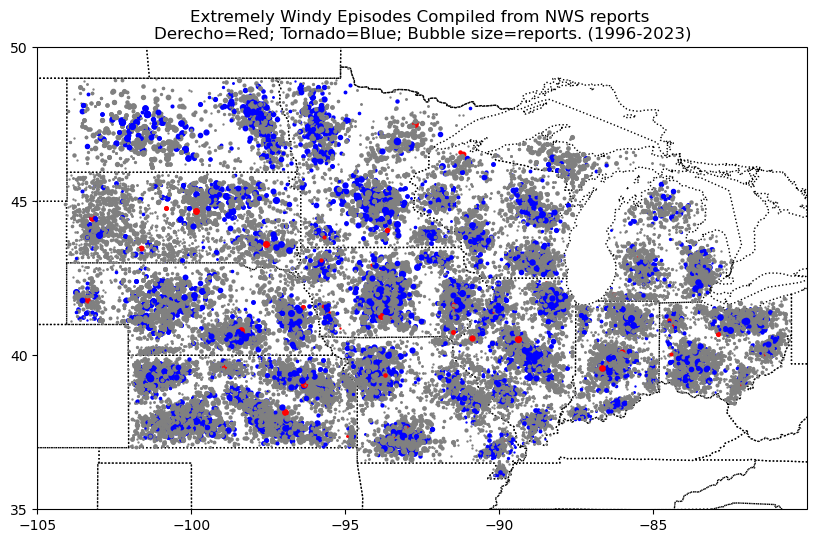

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_events(df):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-80, -105, 35, 50], crs=ccrs.PlateCarree())

    # Map features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':')

    # Plot events
    for _, row in df.iterrows():
        color = 'grey'  
        if row['tornado']:
            color = 'blue'
        elif row['derecho']:
            color = 'red'

        bubblesize = np.log(row['events'])
        ax.plot(row['lon'], row['lat'], 'o', markersize=bubblesize, color=color, transform=ccrs.PlateCarree())

    # Set tickmarks
    ax.set_xticks(np.arange(-105, -80, 5))
    ax.set_yticks(np.arange(35, 51, 5))

    plt.title('Extremely Windy Episodes Compiled from NWS reports \nDerecho=Red; Tornado=Blue; Bubble size=reports. (1996-2023)')
    plt.show()

plot_events(data)

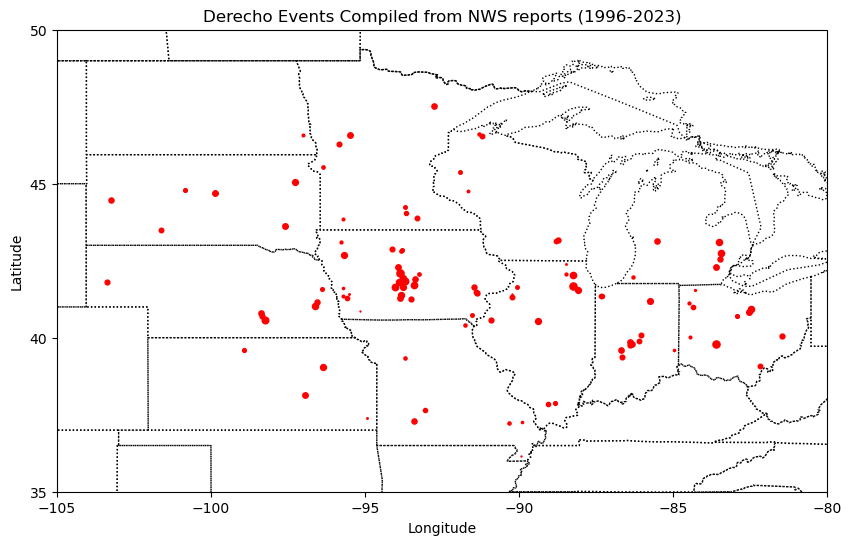

In [7]:


def plot_events(df):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-80, -105, 35, 50], crs=ccrs.PlateCarree())

    # Map features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':')

    # Plot derecho events only
    for _, row in df[df['derecho']].iterrows():
        bubblesize = np.log(row['events'])
        ax.plot(row['lon'], row['lat'], 'o', markersize=bubblesize, color='red', transform=ccrs.PlateCarree())

    # Set tickmarks
    ax.set_xticks(np.arange(-105, -79, 5))
    ax.set_yticks(np.arange(35, 51, 5))

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Derecho Events Compiled from NWS reports (1996-2023)')
    plt.show()

plot_events(data)


In [8]:
data[data['derecho']]

,time,tzone,lat,lon,state,episode,events,derecho,tornado,funnel_cloud,...,sleet,storm_surge_tide,tropical_depression,tropical_storm,tsunami,volcanic_ash,waterspout,wildfire,winter_storm,winter_weather
964,1998-08-25 03:07:30,EST,41.550000,-84.286667,OHIO,2083646,4,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2533,2012-06-29 14:46:03,EST-5,40.991305,-84.340577,OHIO,63554,22,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2534,2012-06-29 15:52:04,EST-5,40.689710,-82.912377,OHIO,65839,15,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2535,2012-06-29 15:52:23,EST-5,39.788981,-83.597045,OHIO,64749,175,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2536,2012-06-29 17:22:29,EST-5,39.096122,-82.169678,OHIO,65230,25,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39031,2020-08-10 15:25:03,CST-6,41.340153,-87.315367,INDIANA,150364,18,True,True,False,...,False,False,False,False,False,False,False,False,False,False
39032,2020-08-10 17:38:13,EST-5,41.182855,-85.753271,INDIANA,151854,49,True,True,False,...,False,False,False,False,False,False,False,False,False,False
39033,2020-08-10 17:38:13,CST-6,41.182855,-85.753271,INDIANA,151854,49,True,True,False,...,False,False,False,False,False,False,False,False,False,False
39034,2020-08-10 18:21:09,EST-5,39.848340,-86.396119,INDIANA,149910,48,True,False,False,...,False,False,False,False,False,False,False,False,False,False


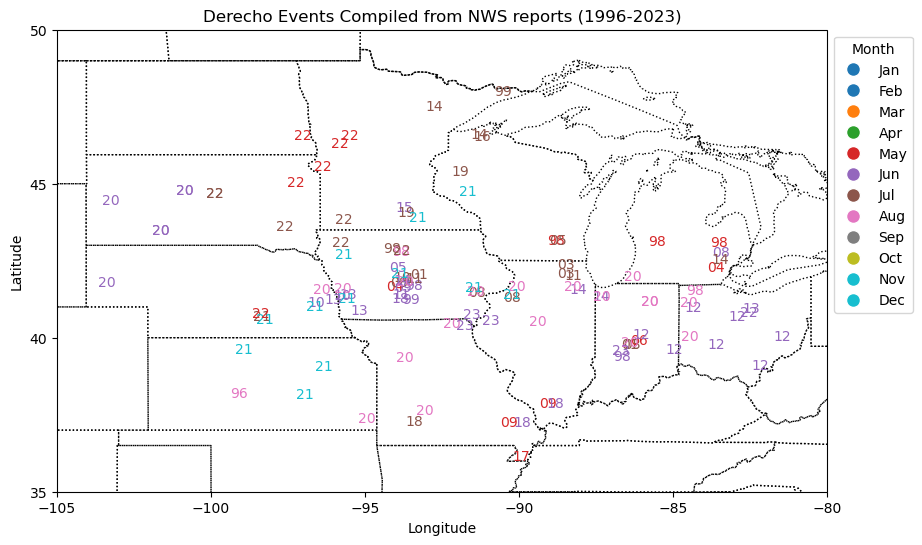

In [9]:

import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_events(df):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-80, -105, 35, 50], crs=ccrs.PlateCarree())

    # Map features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':')

    # Get unique months and assign colors
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    colors = plt.cm.tab10(np.linspace(0, 1, len(months)))
    month_colors = dict(zip(months, colors))

    # Plot derecho events by month
    derecho_data = df[df['derecho']]
    for _, row in derecho_data.iterrows():
        month = row['time'].strftime('%b')
        year = row['time'].strftime('%y')
        bubblesize = np.log(row['events'])
        #ax.plot(row['lon'], row['lat'], 'o', markersize=bubblesize, color=month_colors[month], transform=ccrs.PlateCarree())
        ax.text(row['lon'], row['lat'], year, color=month_colors[month], fontsize=10, ha='center', va='center', transform=ccrs.PlateCarree())
        #print(f"{year}/{month}")

    # Set tickmarks
    ax.set_xticks(np.arange(-105, -79, 5))
    ax.set_yticks(np.arange(35, 51, 5))

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Derecho Events Compiled from NWS reports (1996-2023)')

    # Create custom legend for months
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=month_colors[month], markersize=10, label=month) for month in months]
    ax.legend(handles=handles, title='Month', loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

# Convert 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'])
plot_events(data)
